# AMOS 2019 - IMOS worskhop

# Accessing and visualising AODN data and eReefs data
# A Great Barrier Reef example


# 0. Set-up

## Prerequisite
#### Have conda installed (details available from the python carpentry workshop https://carpentrieslab.github.io/python-aos-lesson/setup.html)

## Directory set-up
#### unzip IMOS_workshop_AMOS2019
#### go to subdirectory IMOS_workshop_python_sst
#### copy IMOS_workshop_python_sst.ipynb in this sub-directory

## Conda environment set-up
#### update to latest conda env: >> conda update -n base -c conda-forge conda
#### create a new environmnet : >> conda create -n imos_workshop -c conda-forge jupyter xarray dask s3fs netCDF4 cartopy pandas cmocean
#### list your conda env: >> conda env list
#### start the amos_workshop env: >> conda activate imos_workshop

## Start notebook :
#### >> jupyter notebook
#### open IMOS_workshop_python_sst.ipynb

#### jupyter notebook short-cuts: https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330


# 1. Visualisation of SSTAARS climatology accessed through AODN S3 depository

### Three ways to access AODN data:
#### 1. AODN portal: https://portal.aodn.org.au/  (Michael notebook)
#### 2. thredds server :  http://thredds.aodn.org.au/thredds/catalog.html
####       SSTAARS example : http://thredds.aodn.org.au/thredds/catalog/CSIRO/Climatology/SSTAARS/2017/AODN-product/catalog.html
#### OPENDAP: /thredds/dodsC/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_001.nc
#### HTTPServer: /thredds/fileServer/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_001.nc

#### 3. Amazon Web Services (AWS) s3 bucket - object oriented repository:  
####               Explore s3 bucket : http://imos-data.s3-website-ap-southeast-2.amazonaws.com/
####               Download from AWS s3 server https://help.aodn.org.au/downloading-data-from-servers/amazon-s3-servers/
####               Accessing/ Downloading using python s3fs library (this notebook)


### Accessing without downloading:
#### In python, you can access the AODN files using OPENDAP or s3fs library.  The s3 bucket is the AODN original depository. To provide DAP access to the file, AODN developed some functions to retrieve (and cache) data files from S3. It is more direct to access the data through S3 directly. 

## 1.1 Accessing and opening the s3 file

In [1]:
#libraries
import xarray as xar
import dask
import s3fs

### IMOS S3 Bucket on Amazon Web Services (AWS)

In [2]:
#s3 FileSystem 
s3 = s3fs.S3FileSystem(anon = True)
# imos bucket on AWS is named 'imos-data'
# list directories using s3.ls
s3.ls('imos-data')

['imos-data/error.html',
 'imos-data/index.html',
 'imos-data/robots.txt',
 'imos-data/Bureau_of_Meteorology',
 'imos-data/CSIRO',
 'imos-data/Deakin_University',
 'imos-data/Department_of_Defence',
 'imos-data/Department_of_Environment_and_Science-Queensland',
 'imos-data/Department_of_Transport-Western_Australia',
 'imos-data/Derwent_Estuary_Program',
 'imos-data/Future_Reef_MAP',
 'imos-data/IMOS',
 'imos-data/Macquarie_University',
 'imos-data/NSW-OEH',
 'imos-data/TERN',
 'imos-data/UNSW',
 'imos-data/UWA',
 'imos-data/WAMSI']

### exercise 1 : Explore the FileSystem, try to find location of CARS climatology
#### 1. use the internet explorer
#### 2. use the s3.ls function 

### SSTAARS climatology  is a CSIRO dataset

In [3]:
# list directories and files using 
s3.ls('imos-data/CSIRO/Climatology/SSTAARS/2017')


['imos-data/CSIRO/Climatology/SSTAARS/2017/SSTAARS.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product']

In [4]:
# original product SSTRAARS.nc (with harmonics) and AODN-product with daily fit already calculated
# SSTAARS climatology : listing directories and daily files
s3.ls('imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product')

['imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_001.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_002.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_003.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_004.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_005.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_006.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_007.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_008.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_009.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_010.nc',
 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_011.nc',
 'imos-d

### Opening a netcdf file with xarray directly from s3

In [48]:
# Opening a daily climatology from AODN-product:
# # 4th of June is day 155
# we can directly open a netcdf file using the s3 location
file = 'imos-data/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit_155.nc'

# But unfortunatly the following does not work because of an attribute read error with NetCDF4 files, 
# so we will download the file locally
#ds = xar.open_mfdataset(file)

### Downloading the netcdf from s3 bucket

In [49]:
# download command : s3.get (s3_file, local_file)
s3.get(file,'sst_155.nc')

### Opening the local file with xarray

In [50]:
# opening the local file with xarray as a dataset
# we need option decode_times=False because this is a climatology with no calendar date associated with it
ds = xar.open_dataset('sst_155.nc',decode_times=False)


In [51]:
# exploring the xarray dataset
ds

<xarray.Dataset>
Dimensions:             (DAY_OF_YEAR: 1, LATITUDE: 4500, LONGITUDE: 6000)
Coordinates:
  * DAY_OF_YEAR         (DAY_OF_YEAR) int16 155
  * LATITUDE            (LATITUDE) float32 -69.99 -69.97 -69.95 ... 19.97 19.99
  * LONGITUDE           (LONGITUDE) float32 70.01 70.03 70.05 ... 189.97 189.99
    DEPTH               float32 ...
Data variables:
    TEMP                (DAY_OF_YEAR, LATITUDE, LONGITUDE) float32 ...
    TEMP_std_err        (DAY_OF_YEAR, LATITUDE, LONGITUDE) float32 ...
    TEMP_mean           (LATITUDE, LONGITUDE) float32 ...
    TEMP_mean_std_err   (LATITUDE, LONGITUDE) float32 ...
    TEMP_trend          (LATITUDE, LONGITUDE) float32 ...
    TEMP_trend_std_err  (LATITUDE, LONGITUDE) float32 ...
Attributes:
    abstract:                      25 years of Advanced Very High-Resolution ...
    acknowledgement:               The User agrees that whenever the Product ...
    author:                        Galibert, Guillaume
    author_email:                

### extracting arrays from the ds dataset for the GBR:

In [52]:
# we only extract the the domain of interest -29.33 to -7.35oN and 141.3 to 158.6 oE
# Finding the indexes:
import numpy as np
lat = ds['LATITUDE'].values
index=np.where((lat>=-29.33) & (lat<=-7.35))
idx_1 = index[0][0]
idx_2 = index[0][-1]

lon = ds['LONGITUDE'].values
index=np.where((lon>=141.3) & (lon<=158.6))
idy_1 = index[0][0]
idy_2 = index[0][-1]

del lon, lat

idx_1, idx_2, idy_1,idy_2

(2033, 3132, 3565, 4429)

In [53]:
#read horizontal grid:
lat_sst = ds['LATITUDE'][idx_1:idx_2].values
lon_sst = ds['LONGITUDE'][idy_1:idy_2].values
#
#read surface temperature in GBR:
SST = ds['TEMP'][0,idx_1:idx_2,idy_1:idy_2].values
SST.shape

(1099, 864)

### exercise 2 : Test the chunks option from xarray and try to find optimal speed


In [41]:
import dask
from dask.diagnostics import ProgressBar
ProgressBar().register()
ds = xar.open_dataset('sst_155.nc',decode_times=False,chunks ={'LATITUDE':1099, 'LONGITUDE':864})
SST = ds['TEMP'][0,idx_1:idx_2,idy_1:idy_2].values


[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  1.4s
[########################################] | 100

In [42]:
import dask
from dask.diagnostics import ProgressBar
ProgressBar().register()
ds = xar.open_dataset('sst_155.nc',decode_times=False,chunks={'LATITUDE':500, 'LONGITUDE':100})
SST = ds['TEMP'][0,idx_1:idx_2,idy_1:idy_2].values

[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  1.5s
[########################################] | 100

## 2. Figure SSTAARS

In [54]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.titlepad'] = 5

In [55]:
#parameters:
#-------------
#Location
minLat,maxLat = -28.9, -7.3
minLon,maxLon = 142, 156
# Color bar
colormap='nipy_spectral'
# Temperature Limits
minC,maxC = 20, 28

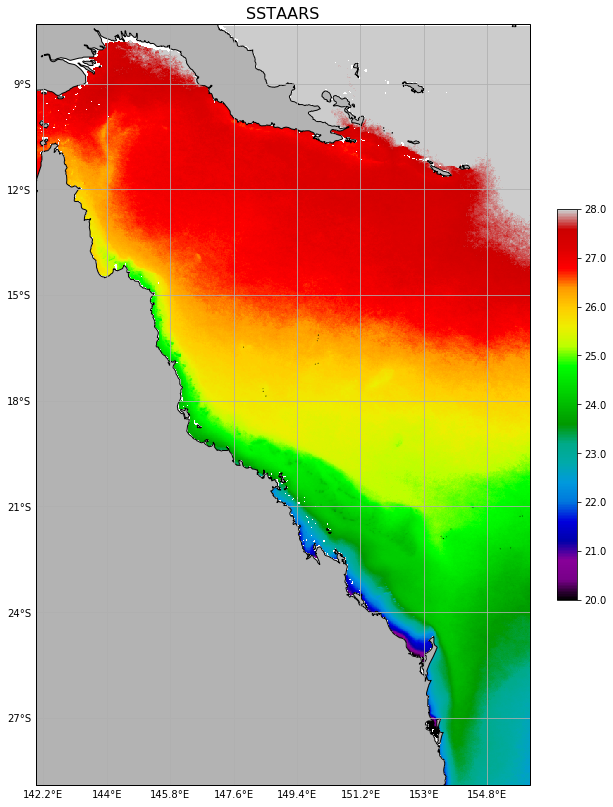

In [57]:
#plot: SSTAARS
#------------------------
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,14),subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
cmap = plt.get_cmap(colormap) 


ax1.set_title('SSTAARS', fontsize=16)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([minLon, maxLon, minLat, maxLat], ccrs.PlateCarree())  
#coastline/land: the download is failing, donwload manually from Natural Earth website using an older version  and then plot the shape features
#ax1.coastlines(resolution='10m', color='black', linewidth=1) 
#ax1.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
cax1 = ax1.pcolor(lon_sst,lat_sst,SST[:], cmap=cmap, vmin=minC, vmax=maxC, transform = ccrs.PlateCarree())
cb = plt.colorbar(cax1,format="%.1f", fraction=0.035, ax=ax1)
ax1.add_geometries(list(shpreader.Reader('ne_10m_land/ne_10m_land.shp').geometries()), 
                      ccrs.PlateCarree(),facecolor=(0.7, 0.7, 0.7),edgecolor='black')




In [58]:
#save the figure 
plt.savefig('SST_SSTAARS_June4.png')
plt.clf()
plt.close(fig)

<Figure size 432x288 with 0 Axes>

# 2. Visualisation of eReefs model accessed through NCI dap thredds server

## 2.1. Accessing and opening file from NCI dap with xarray

In [59]:
#thredds address on the NCI server
file = 'http://dapds00.nci.org.au/thredds/dodsC/fx3/gbr4_v2/gbr4_simple_2019-06.nc'

### ftp download
##http://dapds00.nci.org.au/thredds/fileServer/fx3/gbr4_v2/gbr4_simple_2019-06.nc

In [60]:
# opening the local file with xarray as a dataset
ds = xar.open_dataset(file)

In [61]:
# exploring the xarray dataset
ds

<xarray.Dataset>
Dimensions:      (i: 600, j: 180, k: 47, time: 97)
Coordinates:
    zc           (k) float64 ...
    longitude    (j, i) float64 ...
    latitude     (j, i) float64 ...
  * time         (time) datetime64[ns] 2019-05-31T14:00:00 ... 2019-06-04T14:00:00
Dimensions without coordinates: i, j, k
Data variables:
    botz         (j, i) float64 ...
    eta          (time, j, i) float32 ...
    u            (time, k, j, i) float32 ...
    v            (time, k, j, i) float32 ...
    salt         (time, k, j, i) float32 ...
    temp         (time, k, j, i) float32 ...
    wspeed_u     (time, j, i) float32 ...
    wspeed_v     (time, j, i) float32 ...
    temp_expose  (time, k, j, i) float32 ...
    RT_expose    (time, k, j, i) float32 ...
    dhw          (time, k, j, i) float32 ...
Attributes:
    Run_ID:                          2.1
    hasVocab:                        1
    metadata_link:                   http://marlin.csiro.au/geonetwork/srv/en...
    title:               

### exploring the times from the ds dataset

In [62]:
#exploring the time using pandas dataset
import pandas as pd
times = pd.to_datetime(ds.time.values).round("H")

In [63]:
times[-25:-1]

DatetimeIndex(['2019-06-03 14:00:00', '2019-06-03 15:00:00',
               '2019-06-03 16:00:00', '2019-06-03 17:00:00',
               '2019-06-03 18:00:00', '2019-06-03 19:00:00',
               '2019-06-03 20:00:00', '2019-06-03 21:00:00',
               '2019-06-03 22:00:00', '2019-06-03 23:00:00',
               '2019-06-04 00:00:00', '2019-06-04 01:00:00',
               '2019-06-04 02:00:00', '2019-06-04 03:00:00',
               '2019-06-04 04:00:00', '2019-06-04 05:00:00',
               '2019-06-04 06:00:00', '2019-06-04 07:00:00',
               '2019-06-04 08:00:00', '2019-06-04 09:00:00',
               '2019-06-04 10:00:00', '2019-06-04 11:00:00',
               '2019-06-04 12:00:00', '2019-06-04 13:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
#

### extracting arrays from the ds dataset 

In [64]:
#read horizontal grid:
lat_gbr4  = ds['latitude'][:].values
lon_gbr4= ds['longitude'][:].values

#read SST for 1 June 2019
sst_gbr4 = np.mean(ds['temp'][-25:-1,-1,:,:].values,0)


In [65]:
# checking the dimension of the array
shape = sst_gbr4.shape
shape

(180, 600)

## 2.2. Figure SSTAARS and eReefs

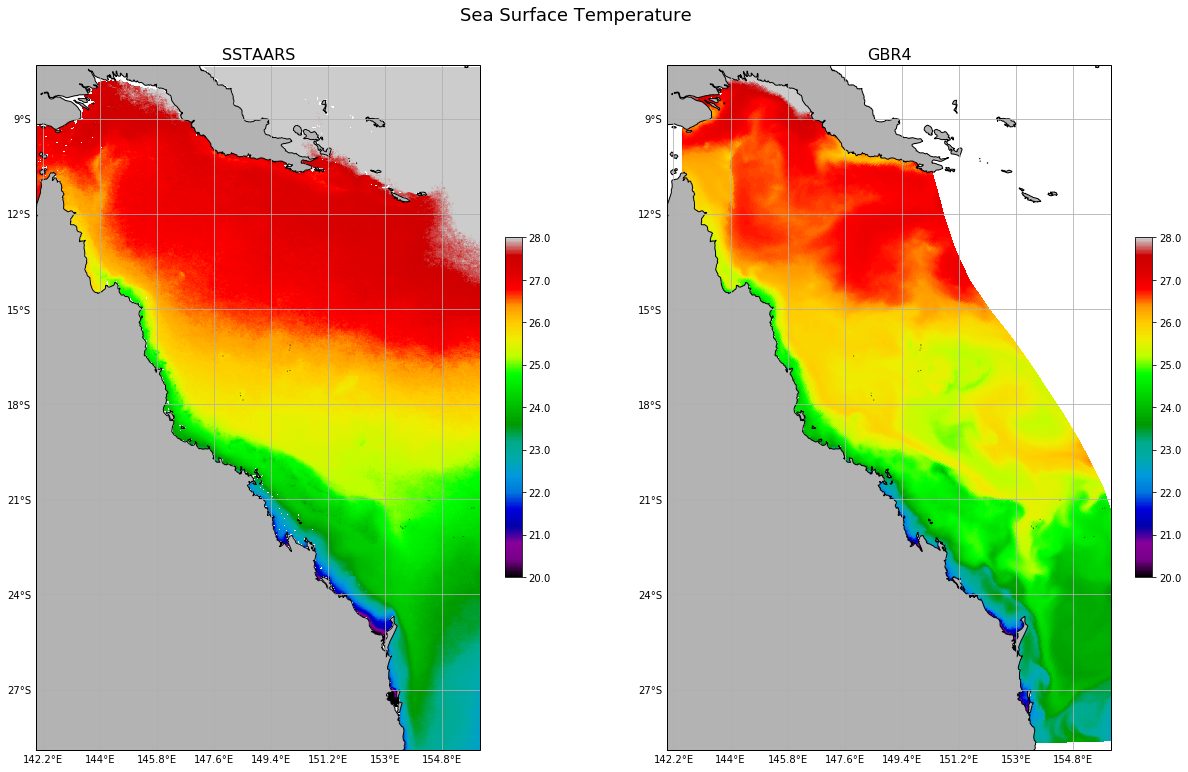

In [66]:
#plot: 2 subplots with SSTAARS - GBR4
#------------------------
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,14),subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
cmap = plt.get_cmap(colormap) 


ax1.set_title('SSTAARS', fontsize=16)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([minLon, maxLon, minLat, maxLat], ccrs.PlateCarree())  
#coastline/land: the download is failing, donwload manually from Natural Earth website using an older version  and then plot the shape features
#ax1.coastlines(resolution='10m', color='black', linewidth=1) 
#ax1.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
cax1 = ax1.pcolor(lon_sst,lat_sst,SST[:], cmap=cmap, vmin=minC, vmax=maxC, transform = ccrs.PlateCarree())
cb = plt.colorbar(cax1,format="%.1f", fraction=0.035, ax=ax1)
ax1.add_geometries(list(shpreader.Reader('ne_10m_land/ne_10m_land.shp').geometries()), 
                      ccrs.PlateCarree(),facecolor=(0.7, 0.7, 0.7),edgecolor='black')

ax2.set_title('GBR4', fontsize=16)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([minLon, maxLon, minLat, maxLat], ccrs.PlateCarree())  
#coastline/land: the download is failing, donwload manually from Natural Earth website using an older version  and then plot the shape features
#ax1.coastlines(resolution='10m', color='black', linewidth=1) 
#ax1.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
cax2 = ax2.pcolor(lon_gbr4,lat_gbr4,sst_gbr4[:], cmap=cmap, vmin=minC, vmax=maxC, transform = ccrs.PlateCarree())
cb = plt.colorbar(cax1,format="%.1f", fraction=0.035, ax=ax2)
ax2.add_geometries(list(shpreader.Reader('ne_10m_land/ne_10m_land.shp').geometries()), 
                      ccrs.PlateCarree(),facecolor=(0.7, 0.7, 0.7),edgecolor='black')

#figure title   
ttl = fig.suptitle('Sea Surface Temperature', fontsize=18)
ttl.set_position([0.5,0.9])


In [67]:
#save the figure 
plt.savefig('SST_SSTAARS_GBR4_June4.png')
plt.clf()
plt.close(fig)

<Figure size 432x288 with 0 Axes>

### Exercise 3: if we have time try to extract and plot another day. For example summer 2016/2017